Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

Load metrics

In [2]:
tfidf = pd.read_csv('/content/drive/MyDrive/Big Data/Code/Metrics/evaluating_performance-tfidf.csv')

In [3]:
bow = pd.read_csv('/content/drive/MyDrive/Big Data/Code/Metrics/evaluating_performance-bow.csv')

In [4]:
all_embeddings = pd.concat([tfidf, bow], ignore_index=True)

In [5]:
mean_tfidf = tfidf.groupby('clustering-algo', as_index=False)[['ARI','AMI','NMI','time']].mean()
mean_bow = bow.groupby('clustering-algo', as_index=False)[['ARI','AMI','NMI','time']].mean()

In [6]:
mean_tfidf['embedding'] = 'TF-IDF'

mean_bow['embedding'] = 'Bag Of Words'

In [7]:
mean_perf = pd.concat([mean_tfidf, mean_bow], ignore_index=True)
mean_perf

clustering-algo       ARI       AMI       NMI         time     embedding
0             HDP  0.002613  0.067591  0.095179    85.536283        TF-IDF
1             LDA  0.000662  0.025723  0.054395  1081.584181        TF-IDF
2             LSI  0.002488  0.064053  0.090843    13.654636        TF-IDF
3             NMF  0.294594  0.463425  0.479222   136.400638        TF-IDF
4         k-means  0.132696  0.414364  0.433602    19.063267        TF-IDF
5             HDP  0.004474  0.083412  0.103052    67.394618  Bag Of Words
6             LDA  0.280901  0.454268  0.470963  1646.696481  Bag Of Words
7             LSI  0.004474  0.083412  0.103052     7.566623  Bag Of Words
8             NMF  0.055281  0.258601  0.283663   201.134503  Bag Of Words

In [8]:
# View top-3 best performers
mean_perf.nlargest(3,['ARI','AMI','NMI','time'])

clustering-algo       ARI       AMI       NMI         time     embedding
3             NMF  0.294594  0.463425  0.479222   136.400638        TF-IDF
6             LDA  0.280901  0.454268  0.470963  1646.696481  Bag Of Words
4         k-means  0.132696  0.414364  0.433602    19.063267        TF-IDF

In [9]:
mean_perf.to_csv('/content/drive/MyDrive/Big Data/Code/Metrics/mean_performance.csv', index=False)
mean_perf.nsmallest(3,['ARI','AMI','NMI','time'])

clustering-algo       ARI       AMI       NMI         time embedding
1             LDA  0.000662  0.025723  0.054395  1081.584181    TF-IDF
2             LSI  0.002488  0.064053  0.090843    13.654636    TF-IDF
0             HDP  0.002613  0.067591  0.095179    85.536283    TF-IDF

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.

Text(0, 0.5, 'Density')

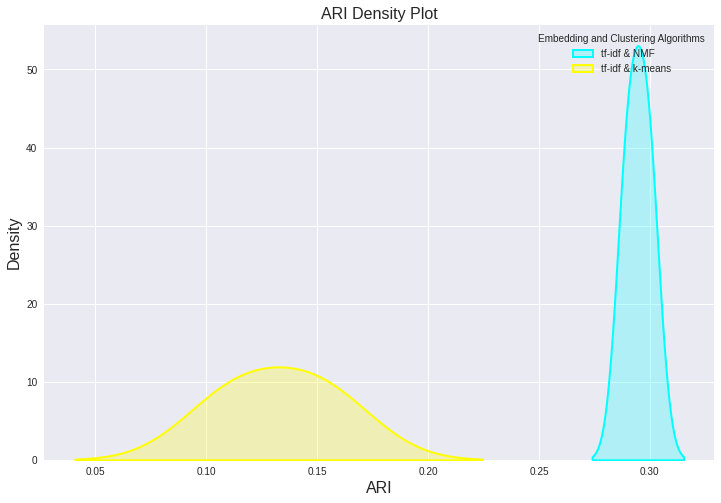

In [10]:
# List of four best performers to plot
embeddings = ['tf-idf', 'Bag of Words', 'tf-idf']
clustering = ['NMF', 'LDA', 'k-means']

plt.figure(figsize=(12,8))

# Iterate through the top 4
color_list = ['cyan', 'pink', 'yellow']
for embedding, cluster_algo, color_item in zip(embeddings, clustering, color_list):
    # Subset to the embedding
    embed_subset = all_embeddings[all_embeddings['feature-extraction'] == embedding]
    combo_subset = embed_subset[embed_subset['clustering-algo'] == cluster_algo]
    combination = embedding +' & '+ cluster_algo
    
    # Draw the density plot
    sns.distplot(combo_subset['ARI'], hist = False, kde = True,
                 color = color_item,
                 kde_kws = {'linewidth': 2, 'shade':True},
                 label = combination)
    
# Plot formatting
plt.legend(title = 'Embedding and Clustering Algorithms')
plt.title('ARI Density Plot', fontsize=16)
plt.xlabel('ARI', fontsize=16)
plt.ylabel('Density', fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.

Text(0, 0.5, 'Density')

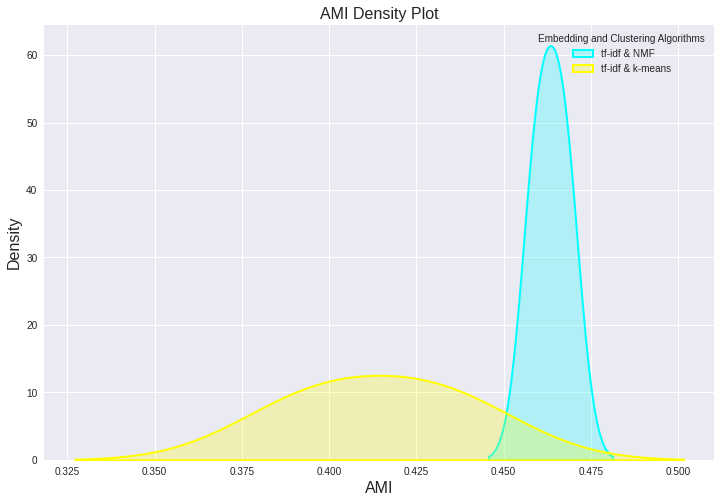

In [11]:
# List of four best performers to plot
embeddings = ['tf-idf', 'Bag of Words', 'tf-idf']
clustering = ['NMF', 'LDA', 'k-means']
plt.figure(figsize=(12,8))
color_list = ['cyan', 'violet', 'yellow']
# Iterate through the top 4
for embedding, cluster_algo, color_item in zip(embeddings, clustering, color_list):
    # Subset to the embedding
    embed_subset = all_embeddings[all_embeddings['feature-extraction'] == embedding]
    combo_subset = embed_subset[embed_subset['clustering-algo'] == cluster_algo]
    combination = embedding +' & '+ cluster_algo
    
    # Draw the density plot
    sns.distplot(combo_subset['AMI'], hist = False, kde = True,
                 color = color_item,
                 kde_kws = {'linewidth': 2, 'shade':True},
                 label = combination)
    
# Plot formatting
plt.legend(title = 'Embedding and Clustering Algorithms')
plt.title('AMI Density Plot', fontsize=16)
plt.xlabel('AMI', fontsize=16)
plt.ylabel('Density', fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.

Text(0, 0.5, 'Density')

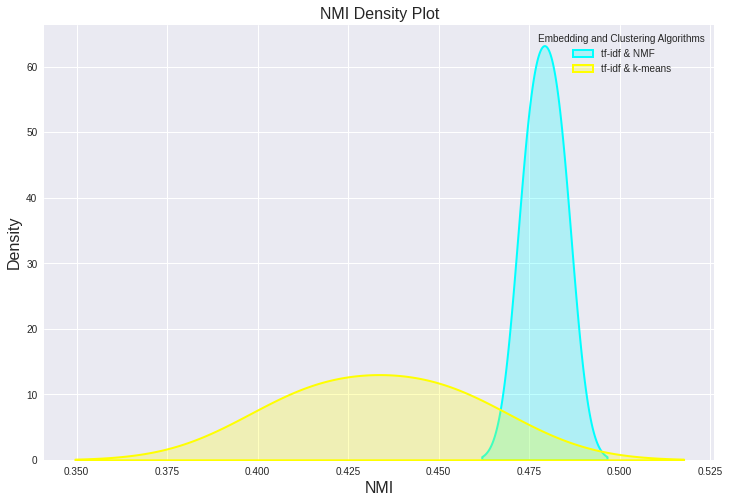

In [12]:
# List of four best performers to plot
embeddings = ['tf-idf', 'Bag of Words', 'tf-idf']
clustering = ['NMF', 'LDA', 'k-means']

plt.figure(figsize=(12,8))

color_list = ['cyan', 'violet', 'yellow']
# Iterate through the top 4
for embedding, cluster_algo, color_item in zip(embeddings, clustering, color_list):
    # Subset to the embedding
    embed_subset = all_embeddings[all_embeddings['feature-extraction'] == embedding]
    combo_subset = embed_subset[embed_subset['clustering-algo'] == cluster_algo]
    combination = embedding +' & '+ cluster_algo
    
    # Draw the density plot
    sns.distplot(combo_subset['NMI'], hist = False, kde = True,
                 color=color_item,
                 kde_kws = {'linewidth': 2, 'shade':True},
                 label = combination)
    
# Plot formatting
plt.legend(title = 'Embedding and Clustering Algorithms')
plt.title('NMI Density Plot', fontsize=16)
plt.xlabel('NMI', fontsize=16)
plt.ylabel('Density', fontsize=16)